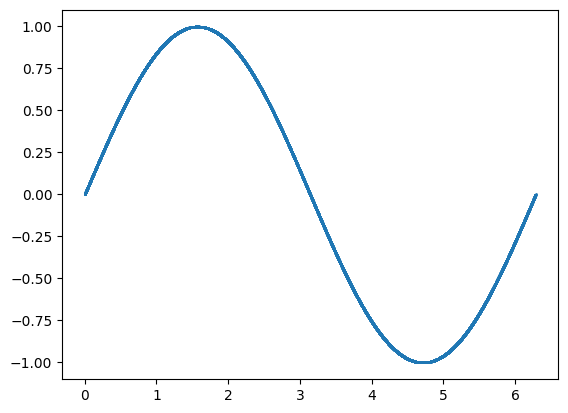

In [1]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
x = np.linspace(0, 2 * np.pi, 10000)[..., None]
y = np.sin(x)
plt.scatter(x, y, s=1)


In [2]:
class LambdaLayer(nn.Module):
    def __init__(self, lambd):
        super(LambdaLayer, self).__init__()
        self.lambd = lambd
        
    def forward(self, x):
        return self.lambd(x)

class NormDistLayer(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()
        # Size of the output is double because it needs room for the media values and for the variance.
        self.linear = nn.Linear(num_inputs, num_outputs*2)
        self.num_outputs = num_outputs
        
        zeros = torch.zeros(num_outputs)
        ones = torch.ones(num_outputs)
        self.normal_dist = torch.distributions.Normal(zeros, ones)
    
    def forward(self, X):
        outputs = self.linear(X)
        scale = outputs[..., :self.num_outputs]
        location = outputs[..., self.num_outputs:]
        
        samples = self.normal_dist.sample()
        return samples * scale + location
    

In [3]:
model = nn.Sequential(
    NormDistLayer(1, 100),
    LambdaLayer(lambda X: X * torch.tanh(X)), # Mish activation
    NormDistLayer(100, 100),
    LambdaLayer(lambda X: X * torch.tanh(X)), # Mish activation
    NormDistLayer(100, 1)
)
opt = optim.Adam(model.parameters(), lr=0.0001)

X = torch.from_numpy(x).float()
Y = torch.from_numpy(y).float()

In [17]:

linear = nn.Linear(1, 200)

zeros = torch.zeros(100)
ones = torch.ones(100)
normal_dist = torch.distributions.Normal(zeros, ones)

samples = normal_dist.sample()

outputs = linear(X)
scale = outputs[..., :100]
location = outputs[..., 100:]
print((outputs))
samples = normal_dist.sample()
# print(samples * scale + location)


tensor([[ 0.1057, -0.7206,  0.9749,  ..., -0.5749,  0.4308,  0.8417],
        [ 0.1054, -0.7201,  0.9755,  ..., -0.5750,  0.4314,  0.8422],
        [ 0.1050, -0.7197,  0.9761,  ..., -0.5751,  0.4319,  0.8427],
        ...,
        [-3.4154,  3.8189,  7.1149,  ..., -1.6593,  6.0984,  5.7829],
        [-3.4158,  3.8194,  7.1155,  ..., -1.6595,  6.0989,  5.7833],
        [-3.4161,  3.8198,  7.1161,  ..., -1.6596,  6.0995,  5.7838]],
       grad_fn=<SliceBackward0>)
